## WEB SCRAPING-ASSIGNMENT-3


## 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.


In [147]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
driver = webdriver.Chrome('chromedriver.exe')

C:\Users\EXPERT SOLUTION\AppData\Local\Temp\ipykernel_3348\1803948374.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [148]:
driver.get('https://www.amazon.in/')

In [149]:
search_field = driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search_field.send_keys('Guitar')

In [150]:
search_button = driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_button.click()

## 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.


## Extract brand name

In [151]:
# Let's extract all web elements having brands using relative xpath
brand = []

for page in range(1,4,1):
    
    brand_tag = driver.find_elements(By.XPATH,'//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-4"]')
    for i in brand_tag:
        brand.append(i.text.split( )[0])
len(brand)        

        ##next_btn = driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[1]/div[1]/div/span[1]/div[1]/div[66]/div/div/span/a[4]')
#next_btn.click()
#time.sleep(3)
#brand
    

180

## Extract Product name

In [152]:
# Let's extract all web elements having productname using relative xpath
product = []

for page in range(1,4,1):
    
    product_tag = driver.find_elements(By.XPATH,'//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-4"]')
    for i in product_tag:
        product.append(i.text.split( )[1])
len(product)        


180

## extract Price

In [160]:
# Let's extract all web elements having price using relative xpath
price = []
try:
    for page in range(1,4,1):
    
        price_tag = driver.find_elements(By.XPATH,'//span[@class="a-price-whole"]')
        for i in price_tag:
            price.append(i.text)
except NoSuchElementException:
    price.append('-')
pric =price[0:180]        


## Extract Extected delivery

In [166]:
# Let's extract all web elements having Expected delivery 
delivery=[]
try:
    for page in range(1,4,1):
    
        del_tag = driver.find_elements(By.XPATH,'//span[@class="a-color-base a-text-bold"]')
        for i in del_tag:
            delivery.append(i.text)
except NoSuchElementException:
    delivery.append('-')
deliver = delivery[0:180] 
deliver

['Monday, November 28',
 'Sunday, November 27',
 'Sunday, November 27',
 'Sunday, November 27',
 'Sunday, November 27',
 'Sunday, November 27',
 'Thursday, November 24',
 'Monday, November 28',
 'Wednesday, November 30',
 'Thursday, November 24',
 'Sunday, November 27',
 'Thursday, November 24',
 'Monday, November 28',
 'Sunday, November 27',
 'Saturday, November 26',
 'Sunday, November 27',
 'Monday, November 28',
 'Sunday, November 27',
 'Sunday, November 27',
 'Sunday, November 27',
 'Sunday, November 27',
 'Sunday, November 27',
 'Thursday, November 24',
 'Friday, November 25',
 'Monday, November 28',
 'Sunday, November 27',
 'Saturday, November 26',
 'Saturday, November 26',
 'Sunday, November 27',
 'Saturday, November 26',
 'Thursday, November 24',
 'Thursday, November 24',
 'Sunday, November 27',
 'Sunday, November 27',
 'Sunday, November 27',
 'Friday, November 25',
 'Sunday, November 27',
 'Monday, November 28',
 'Sunday, November 27',
 'Sunday, November 27',
 'Sunday, Novembe

## extract product URL

In [163]:
# Let's extract all web elements having product URL delivery 
p_url=[]
try:
    for page in range(1,4,1):
    
        p_url_tag = driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
        for i in p_url_tag:
            p_url.append(i.get_attribute('href'))
except NoSuchElementException:
    p_url.append('-')
product_url=p_url[0:180]        

In [167]:
print(len(brand),len(deliver),len(product_url),len(pric),len(product))

180 180 180 180 180


In [169]:
df = pd.DataFrame({'Brand Nmae':brand,'Product Name':product,'Expected Delivery':deliver,'Price':pric,'Product URL':product_url})
df.head(30)

,Brand Nmae,Product Name,Expected Delivery,Price,Product URL
0,Kadence,Slowhand,"Monday, November 28","18,990",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Bestonl,String,"Sunday, November 27","18,990",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Vault,DA40,"Sunday, November 27","18,990",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Vault,EA40,"Sunday, November 27","9,999",https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,Intern,INT-38C,"Sunday, November 27",899,https://www.amazon.in/Intern-INT-38C-Acoustic-...
5,Juârez,Acoustic,"Sunday, November 27","6,930",https://www.amazon.in/Juarez-Acoustic-Cutaway-...
6,Intern,INT-38C,"Thursday, November 24","7,290",https://www.amazon.in/Intern-INT-38C-Acoustic-...
7,Yamaha,F280,"Monday, November 28","2,299",https://www.amazon.in/Yamaha-F280-Acoustic-Gui...
8,Intern,INT-38C-BK-G,"Wednesday, November 30","2,399",https://www.amazon.in/Intern-INT-38C-BK-G-Guit...
9,Intern,INT-38C,"Thursday, November 24","2,399",https://www.amazon.in/Intern-INT-38C-Acoustic-...


In [ ]:
driver.close()

## 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.


In [101]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
import urllib

In [102]:
driver = webdriver.Chrome('chromedriver.exe')

In [103]:
# open automated chrome window
driver.get('https://www.google.com/')

In [104]:
search_button = driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[2]/a')
search_button.click()

In [107]:
search_field_image = driver.find_element(By.XPATH,'//input[@class="gLFyf"]')
search_field_image.send_keys('images of fruits')
search_button = driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
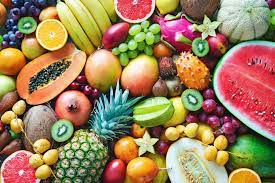
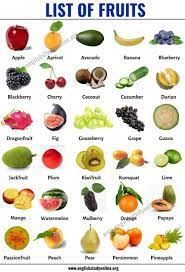
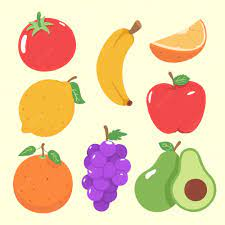
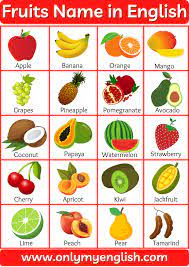
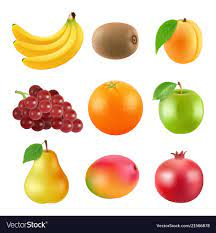
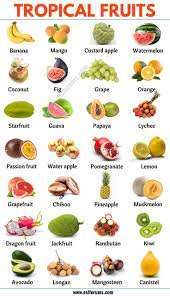
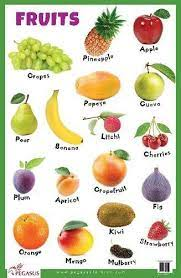
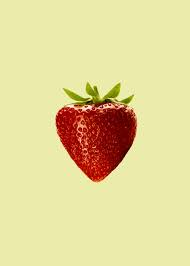
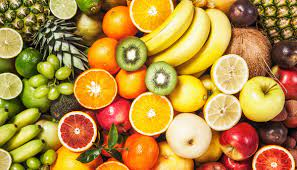
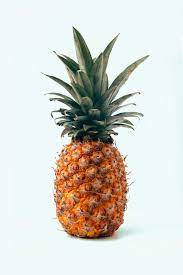

In [108]:
# extracting fruits images
fruits_images = []
try:
    fruits = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in fruits[0:10]:
        fruits_images.append(i.get_attribute('src'))
except NoSuchElementException:
    fruits_images.append('-')
fruits_images    

In [125]:
# download the images
fruits=[]
for i in range(10):    
    f=urllib.request.urlretrieve(str(fruits_images[i]),"Downloads/images of fruits{}.jpg".format(i))
    for j in f:
        fruits.append(j)
fruits   

['Downloads/images of fruits0.jpg',
 'Downloads/images of fruits1.jpg',
 'Downloads/images of fruits2.jpg',
 'Downloads/images of fruits3.jpg',
 'Downloads/images of fruits4.jpg',
 'Downloads/images of fruits5.jpg',
 'Downloads/images of fruits6.jpg',
 'Downloads/images of fruits7.jpg',
 'Downloads/images of fruits8.jpg',
 'Downloads/images of fruits9.jpg',

In [126]:
search_field_image = driver.find_element(By.XPATH,'//input[@class="og3lId"]')
search_field_image.clear()
search_field_image = driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
search_field_image.send_keys('images of cars')
search_button = driver.find_element(By.XPATH,'//button[@class="rCGXm"]')
search_button.click()    

In [127]:
# extracting cars images
cars_images = []
try:
    cars = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in cars[0:10]:
        cars_images.append(i.get_attribute('src'))
except StaleElementReferenceException:
    cars_images.append('-')    

In [128]:
# download the images
cars=[]
for i in range(10):    
    c=urllib.request.urlretrieve(str(cars_images[i]),"Downloads/images of cars{}.jpg".format(i))
    for j in c:
        cars.append(j)
cars   

['Downloads/images of cars0.jpg',
 'Downloads/images of cars1.jpg',
 'Downloads/images of cars2.jpg',
 'Downloads/images of cars3.jpg',
 'Downloads/images of cars4.jpg',
 'Downloads/images of cars5.jpg',
 'Downloads/images of cars6.jpg',
 'Downloads/images of cars7.jpg',
 'Downloads/images of cars8.jpg',
 'Downloads/images of cars9.jpg',

In [129]:
search_field_clear = driver.find_element(By.XPATH,'//input[@class="og3lId"]')
search_field_clear.clear()
search_field_image = driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
search_field_image.send_keys('images of cakes')
search_button = driver.find_element(By.XPATH,'//button[@class="rCGXm"]')
search_button.click()    

In [130]:
# extracting cakes images
cakes_images = []
try:
    cakes = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in cakes[0:10]:
        cakes_images.append(i.get_attribute('src'))
except NoSuchElementException:
    cakes_images.append('-')
    

In [131]:
# download the images
cakes=[]
for i in range(10):    
    ca=urllib.request.urlretrieve(str(cakes_images[i]),"Downloads/images of cakes{}.jpg".format(i))
    for j in ca:
        cakes.append(j)
cakes   

['Downloads/images of cakes0.jpg',
 'Downloads/images of cakes1.jpg',
 'Downloads/images of cakes2.jpg',
 'Downloads/images of cakes3.jpg',
 'Downloads/images of cakes4.jpg',
 'Downloads/images of cakes5.jpg',
 'Downloads/images of cakes6.jpg',
 'Downloads/images of cakes7.jpg',
 'Downloads/images of cakes8.jpg',
 'Downloads/images of cakes9.jpg',

In [132]:
search_field_clear = driver.find_element(By.XPATH,'//input[@class="og3lId"]')
search_field_clear.clear()
search_field_image = driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
search_field_image.send_keys('images of Guitar')
search_button = driver.find_element(By.XPATH,'//button[@class="rCGXm"]')
search_button.click()    

In [133]:
# extracting Guitar images
guitar_images = []
try:
    guitar = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in guitar[0:10]:
        guitar_images.append(i.get_attribute('src'))
except StaleElementReferenceException:
    guitar_images.append('-')
    

In [134]:
# download the images
guitar=[]
for i in range(10):    
    g=urllib.request.urlretrieve(str(guitar_images[i]),"Downloads/images of Guitar{}.jpg".format(i))
    for j in g:
        guitar.append(j)
guitar   

['Downloads/images of Guitar0.jpg',
 'Downloads/images of Guitar1.jpg',
 'Downloads/images of Guitar2.jpg',
 'Downloads/images of Guitar3.jpg',
 'Downloads/images of Guitar4.jpg',
 'Downloads/images of Guitar5.jpg',
 'Downloads/images of Guitar6.jpg',
 'Downloads/images of Guitar7.jpg',
 'Downloads/images of Guitar8.jpg',
 'Downloads/images of Guitar9.jpg',

In [135]:
search_field_clear = driver.find_element(By.XPATH,'//input[@class="og3lId"]')
search_field_clear.clear()
search_field_image = driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')
search_field_image.send_keys('images of Machine Learning')
search_button = driver.find_element(By.XPATH,'//button[@class="rCGXm"]')
search_button.click()    

In [136]:
# extracting Machine Learning images
ML_images = []
try:
    ML = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in ML[0:10]:
        ML_images.append(i.get_attribute('src'))
except StaleElementReferenceException:
    ML_images.append('-')    

In [137]:
# download the images
ML=[]
for i in range(10):    
    m=urllib.request.urlretrieve(str(ML_images[i]),"Downloads/images of Machine Learning{}.jpg".format(i))
    for j in m:
        ML.append(j)
ML   

['Downloads/images of Machine Learning0.jpg',
 'Downloads/images of Machine Learning1.jpg',
 'Downloads/images of Machine Learning2.jpg',
 'Downloads/images of Machine Learning3.jpg',
 'Downloads/images of Machine Learning4.jpg',
 'Downloads/images of Machine Learning5.jpg',
 'Downloads/images of Machine Learning6.jpg',
 'Downloads/images of Machine Learning7.jpg',
 'Downloads/images of Machine Learning8.jpg',
 'Downloads/images of Machine Learning9.jpg',

In [138]:
driver.close()

## 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) onwww.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.


In [1]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()

C:\Users\EXPERT SOLUTION\AppData\Local\Temp\ipykernel_10664\1460748407.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [2]:
driver.get('https://www.flipkart.com/')

In [3]:
search_field = driver.find_element(By.CLASS_NAME,'_3704LK')
search_field.send_keys('Oneplus Nord')
search_button = driver.find_element(By.CLASS_NAME,'L0Z3Pu')
search_button.click()

## Extract brand name

In [17]:
# Let's extract all web elements having brand name
brand_name= []
try:
    brand_tag = driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
    for i in brand_tag:
        brand_name.append(i.text.split(' ')[0])
except NoSuchElementException:
    brand_name.append('-')   

## Extract smartphone name

In [18]:
# Let's extract all web elements having smartphone name
smartphone_name= []
try:
    smartphone_tag = driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
    for i in smartphone_tag:
        smartphone_name.append(i.text.split('(')[0])
except NoSuchElementException:
    smartphone_name.append('-')   

## Extract  colour and ROM

In [19]:
# Let's extract all web elements having colour
colour= []
try:
    colour_tag = driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
    for i in colour_tag:
        colour.append(i.text.split('(')[1])
except NoSuchElementException:
    colour.append('-')    

## Extracting RAM

In [20]:
# Let's extract all web elements having RAM
RAM= []
try:
    RAM_tag = driver.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]')
    for i in RAM_tag:
        RAM.append(i.text.split('|')[0])
except NoSuchElementException:
    RAM.append('-')    

## Extract display size

In [21]:
# Let's extract all web elements having Display
display= []
try:
    display_tag = driver.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]')
    for i in display_tag:
        display.append(i.text.split('\n')[1])
except NoSuchElementException:
    display.append('-')   

## Extract Camera

In [22]:
# Let's extract all web elements having Camera
camera= []
try:
    camera_tag = driver.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]')
    for i in camera_tag:
        camera.append(i.text.split('\n')[2])
except NoSuchElementException:
    camera.append('-')    

## Extract Battery capacity

In [23]:
# Let's extract all web elements having battery capacity
battery= []
try:
    battery_tag = driver.find_elements(By.XPATH,'//ul[@class="_1xgFaf"]')
    for i in battery_tag:
        battery.append(i.text.split('\n')[3])
except NoSuchElementException:
    battery.append('-')  

## Extracting Price

In [24]:
# Let's extract all web elements having price
price= []
try:
    price_tag = driver.find_elements(By.XPATH,'//div[@class="_30jeq3 _1_WHN1"]')
    for i in price_tag:
        price.append(i.text)
except NoSuchElementException:
    price.append('-')    

## Extracting Product URL

In [25]:
# Let's extract all web elements having product url
p_url= []
try:
    p_url_tag = driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
    for i in p_url_tag:
        p_url.append(i.get_attribute('href'))
except NoSuchElementException:
    p_url.append('-')    

In [16]:
df = pd.DataFrame({'Brand Name':brand_name,'Smartphone Name':smartphone_name,'Colour & ROM':colour,'RAM':RAM,'Camera':camera,'Display Size':display,'Battery Capacity':battery,'Price':price,'Product URL':p_url})
df

,Brand Name,Smartphone Name,Colour & ROM,RAM,Camera,Display Size,Battery Capacity,Price,Product URL
0,OnePlus,OnePlus Nord CE 2 Lite 5G,"Black Dusk, 128 GB)",6 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,977",https://www.flipkart.com/oneplus-nord-ce-2-lit...
1,OnePlus,OnePlus Nord CE 2 Lite 5G,"Blue Tide, 128 GB)",6 GB RAM,64MP Rear Camera | 16MP Front Camera,16.74 cm (6.59 inch) HD+ Display,5000 mAh Battery,"₹19,990",https://www.flipkart.com/oneplus-nord-ce-2-lit...
2,OnePlus,OnePlus Nord CE 2 Lite 5G,"Black Dusk, 128 GB)",6 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,982",https://www.flipkart.com/oneplus-nord-ce-2-lit...
3,OnePlus,OnePlus Nord CE 2 Lite 5G,"Black Dusk, 128 GB)",8 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹21,999",https://www.flipkart.com/oneplus-nord-ce-2-lit...
4,OnePlus,OnePlus Nord 2 5G,"Gray Sierra, 256 GB)",12 GB RAM,50MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹34,499",https://www.flipkart.com/oneplus-nord-2-5g-gra...
5,OnePlus,OnePlus Nord 2 5G,"Blue Haze, 256 GB)",12 GB RAM,50MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹34,499",https://www.flipkart.com/oneplus-nord-2-5g-blu...
6,OnePlus,OnePlus Nord CE 2 Lite 5G,"Black Dusk, 128 GB)",6 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,948",https://www.flipkart.com/oneplus-nord-ce-2-lit...
7,OnePlus,OnePlus Nord 2T 5G,"Gray Shadow, 256 GB)",12 GB RAM,50MP Rear Camera,17.02 cm (6.7 inch) Display,4500 mAh Battery,"₹33,890",https://www.flipkart.com/oneplus-nord-2t-5g-gr...
8,OnePlus,OnePlus Nord 2T 5G,"Gray Shadow, 256 GB)",12 GB RAM,50MP Rear Camera,17.02 cm (6.7 inch) Display,4500 mAh Battery,"₹33,860",https://www.flipkart.com/oneplus-nord-2t-5g-gr...
9,OnePlus,OnePlus Nord N20 SE,"Blue Oasis, 64 MB)",4 MB RAM,50MP Rear Camera,16.66 cm (6.56 inch) Display,5000 mAh Battery,"₹14,799",https://www.flipkart.com/oneplus-nord-n20-se-b...


In [26]:
df.to_csv('Oneplus Nord.csv')

In [28]:
data = pd.read_csv('Oneplus Nord.csv')
data.head()

,Unnamed: 0,Brand Name,Smartphone Name,Colour & ROM,RAM,Camera,Display Size,Battery Capacity,Price,Product URL
0,0,OnePlus,OnePlus Nord CE 2 Lite 5G,"Black Dusk, 128 GB)",6 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,977",https://www.flipkart.com/oneplus-nord-ce-2-lit...
1,1,OnePlus,OnePlus Nord CE 2 Lite 5G,"Blue Tide, 128 GB)",6 GB RAM,64MP Rear Camera | 16MP Front Camera,16.74 cm (6.59 inch) HD+ Display,5000 mAh Battery,"₹19,990",https://www.flipkart.com/oneplus-nord-ce-2-lit...
2,2,OnePlus,OnePlus Nord CE 2 Lite 5G,"Black Dusk, 128 GB)",6 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹19,982",https://www.flipkart.com/oneplus-nord-ce-2-lit...
3,3,OnePlus,OnePlus Nord CE 2 Lite 5G,"Black Dusk, 128 GB)",8 GB RAM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹21,999",https://www.flipkart.com/oneplus-nord-ce-2-lit...
4,4,OnePlus,OnePlus Nord 2 5G,"Gray Sierra, 256 GB)",12 GB RAM,50MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,"₹34,499",https://www.flipkart.com/oneplus-nord-2-5g-gra...


In [29]:
driver.close()

## 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps

In [91]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()

C:\Users\EXPERT SOLUTION\AppData\Local\Temp\ipykernel_3348\1460748407.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [96]:

driver.get('https://www.google.com/')

In [97]:
search_field = driver.find_element(By.XPATH,'//input[@class="gLFyf"]')
search_field.send_keys('Rohtak geospatial coordinates')

In [98]:
search_button = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[4]/center/input[1]')
search_button.click()

## extracting Geospatial

In [102]:
longitude = []
longitud = driver.find_elements(By.XPATH,'//span[@class="LrzXr kno-fv wHYlTd z8gr9e"]')
for i in longitud:
    longitude.append(i.text.split(',')[:1])
longitude    


[['76.606613'], ['28.895515'], ['India'], ["28° 53' 43.8540'' N"]]

In [103]:
df = pd.DataFrame({"Longitude_RTK_CITY":longitude[0]})
df

,Longitude_RTK_CITY
0,76.606613


In [105]:
df_1= pd.DataFrame({'Latitude_RTK_CITY':longitude[1]})
df_1

,Latitude_RTK_CITY
0,28.895515


In [106]:
df_1['Longitude_RTK_CITY']=df['Longitude_RTK_CITY']
df_1

,Latitude_RTK_CITY,Longitude_RTK_CITY
0,28.895515,76.606613


In [107]:
driver.close()

## 6. Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.


In [59]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()

C:\Users\EXPERT SOLUTION\AppData\Local\Temp\ipykernel_10664\1460748407.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [60]:
driver.get('https://trak.in/')

In [71]:
more_button = driver.find_element(By.XPATH,'/html/body/div[1]/header/div[2]/div/div/div/div/nav/ul/li[9]/a')
more_button.click()
funding = driver.find_element(By.XPATH,'/html/body/div[1]/header/div[2]/div/div/div/div/nav/ul/li[9]/ul/li[1]/a')
funding.click()

## extract funding deals for Jan 2021 to Mar 2021

In [72]:
# Let's extract all web elements having Date
date= []
try:
    date_tag = driver.find_elements(By.XPATH,'//td[@class="column-2"]')
    for i in date_tag[5:29]:
        date.append(i.text)
except NoSuchElementException:
    date.append('-') 
date    

['04/03/2021',
 '31/03/2021',
 '30/03/2021',
 '30/03/2021',
 '23/03/2021',
 '25/03/2021',
 '26/03/2021',
 '11/02/2021',
 '22/02/2021',
 '19/02/2021',
 '17/02/2021',
 '15/02/2021',
 '12/02/2021',
 '12/02/2021',
 '09/02/2021',
 '09/02/2021',
 '15/01/2021',
 '28/01/2021',
 '19/01/2021',
 '19/01/2021',
 '18/01/2021',
 '18/01/2021',
 '11/01/2021',
 '13/01/2021']

In [73]:
# Let's extract all web elements having Startup name
startup= []
try:
    startup_tag = driver.find_elements(By.XPATH,'//td[@class="column-3"]')
    for i in startup_tag[5:29]:
        startup.append(i.text)
except NoSuchElementException:
    startup.append('-') 
startup    

['DealShare',
 'Uniphore',
 'Dunzo',
 'BYJU’S',
 'SkilloVilla',
 'CityMall',
 'DotPe',
 'Doubtnut',
 'Zomato',
 'Fingerlix',
 'Zolve',
 'KreditBee',
 'Pepperfry',
 'Grofers',
 'Nothing',
 'SplashLearn',
 'Digit Insurance',
 'Bombay Shaving Company',
 'DeHaat',
 'Darwinbox',
 'mfine',
 'Udayy',
 'True Elements',
 'Saveo']

In [74]:
# Let's extract all web elements having industry
industry= []
try:
    industry_tag = driver.find_elements(By.XPATH,'//td[@class="column-4"]')
    for i in industry_tag[5:29]:
        industry.append(i.text)
except NoSuchElementException:
    industry.append('-') 
industry    

['E-commerce',
 'Technology',
 'E-commerce',
 'Edu-tech',
 'Edu-tech',
 'E-commerce',
 'FinTech',
 'Edu Tech',
 'Hospitality',
 'Hospitality',
 'FinTech',
 'Finance',
 'E-commerce',
 'E-Commerce',
 'Technology',
 'EdTech',
 'Financial Services',
 'Consumer Goods Company',
 'AgriTech Startup',
 'SaaS',
 'Health Tech Startup',
 'EdTech',
 'Food Startup',
 'B2B E-commerce']

In [75]:
# Let's extract all web elements having Sub-Vertical
vertical= []
try:
    vertical_tag = driver.find_elements(By.XPATH,'//td[@class="column-5"]')
    for i in vertical_tag[5:29]:
        vertical.append(i.text)
except NoSuchElementException:
    vertical.append('-') 
vertical    

['Online shopping platform',
 'Conversational Service Automation (CSA)',
 'Hyper-local delivery app',
 'Online tutoring',
 'Career and job-oriented upskilling.',
 'Social ecommerce and online grocery platform',
 'Commerce and payments platform to offline enterprise businesses.',
 'E-Learning Platform',
 'Online Food Delivery Platform',
 'Semi-cooked food delivery app',
 'Global Neobank Venture',
 'Digital lending platform',
 'Multi-brand furniture brand',
 'Online supermarket',
 'Consumer Technology Venture',
 'Game-based learning programme',
 'Insurance Services',
 'Shave care, beard care, and skincare products',
 'online marketplace for farm products and services',
 'HR Tech',
 'AI-powered telemedicine mobile app',
 'Online learning platform for kids in class 1-5',
 'Whole Food plant based Nashta',
 'Pharmacies']

In [76]:
# Let's extract all web elements having city/location
city= []
try:
    city_tag = driver.find_elements(By.XPATH,'//td[@class="column-6"]')
    for i in city_tag[5:29]:
        city.append(i.text)
except NoSuchElementException:
    city.append('-') 
city    

['Jaipur, Rajasthan',
 'Palo Alto',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Mumbai',
 'Mumbai',
 'Bengaluru',
 'Mumbai',
 'Gurgaon',
 'London',
 'Gurgaon',
 'Bengaluru',
 'New Delhi',
 'Patna',
 'Mumbai',
 'Bengaluru',
 'Gurgaon',
 'Pune',
 'Bengaluru']

In [77]:
# Let's extract all web elements having investor's name
investor= []
try:
    investor_tag = driver.find_elements(By.XPATH,'//td[@class="column-7"]')
    for i in investor_tag[5:29]:
        investor.append(i.text)
except NoSuchElementException:
    investor.append('-') 
investor    

['Innoven Capital',
 'Sorenson Capital Partners',
 'Krishtal Advisors Pte Ltd',
 'MC Global Edtech, B Capital, Baron, others',
 'Titan Capital, others',
 'Accel Partners',
 'PayU',
 'SIG Global, Sequoia Capital, WaterBridge Ventures and ON Mauritius',
 'Tiger Global, Kora',
 'Rhodium Trust, Accel Partners and Swiggy',
 'Accel Partners and Lightspeed Venture Partners',
 'Azim Premji’s PremjiInvest and South Korea’s Mirae Asset Venture',
 'InnoVen Capital',
 'SoftBank Vision Fund (SVF)',
 'GV',
 'Owl Ventures',
 'A91 Partners, Faering Capital, TVS Capital Funds',
 'Reckitt Benckiser',
 'Prosus Ventures',
 'Salesforce Ventures',
 'Heritas Capital Management',
 'Sequoia Capital',
 'SIDBI Venture Capital',
 'Matrix Partners India, RTP Global, others']

In [78]:
# Let's extract all web elements having investment type
investment= []
try:
    investment_tag = driver.find_elements(By.XPATH,'//td[@class="column-8"]')
    for i in investment_tag[5:29]:
        investment.append(i.text)
except NoSuchElementException:
    investment.append('-') 
investment    

['Debt Financing',
 'Series D',
 'Series E',
 'Series F',
 'Seed',
 'Series A',
 'Series A',
 'Series B',
 'Venture',
 'Series C',
 'Seed',
 'Series C',
 'Debt Financing',
 'Unspecified',
 'Series A',
 'Series C',
 'Venture',
 'Venture',
 'Series C',
 'Seed',
 'Venture Round',
 'Seed Funding',
 'Series',
 'Seed']

In [79]:
# Let's extract all web elements having Amount(in USD)
amount= []
try:
    amount_tag = driver.find_elements(By.XPATH,'//td[@class="column-9"]')
    for i in amount_tag[5:29]:
        amount.append(i.text)
except NoSuchElementException:
    amount.append('-') 
amount    

['250,000,000',
 '140,000,000',
 '8,000,000',
 '460,000,000',
 '300,000,000',
 '11,000,000',
 '27,500,000',
 '2,500,000',
 '250,000,000',
 '2,747,045.20',
 '1,50,00,000',
 '75,000,000',
 '4,773,958',
 '55,000,000',
 '15,000,000',
 '18,000,000',
 '1,80,00,000',
 '6,172,258.50',
 '30,000,000',
 '15,000,000',
 '16,000,000',
 '15,000,000',
 '100,000,000',
 '4,000,000']

In [80]:
df = pd.DataFrame({'Date(dd/mm/yyyy)':date,'Startup Name':startup,'Industrty/ Vertical':industry,'Sub Vertical':vertical,'City/Location':city,'Investor name':investor,'Investment Type':investment,'Amount(In USD)':amount})
df

,Date(dd/mm/yyyy),Startup Name,Industrty/ Vertical,Sub Vertical,City/Location,Investor name,Investment Type,Amount(In USD)
0,04/03/2021,DealShare,E-commerce,Online shopping platform,"Jaipur, Rajasthan",Innoven Capital,Debt Financing,"250,000,000"
1,31/03/2021,Uniphore,Technology,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,"140,000,000"
2,30/03/2021,Dunzo,E-commerce,Hyper-local delivery app,Bengaluru,Krishtal Advisors Pte Ltd,Series E,"8,000,000"
3,30/03/2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series F,"460,000,000"
4,23/03/2021,SkilloVilla,Edu-tech,Career and job-oriented upskilling.,Bengaluru,"Titan Capital, others",Seed,"300,000,000"
5,25/03/2021,CityMall,E-commerce,Social ecommerce and online grocery platform,Gurgaon,Accel Partners,Series A,"11,000,000"
6,26/03/2021,DotPe,FinTech,Commerce and payments platform to offline ente...,Gurgaon,PayU,Series A,"27,500,000"
7,11/02/2021,Doubtnut,Edu Tech,E-Learning Platform,Gurgaon,"SIG Global, Sequoia Capital, WaterBridge Ventu...",Series B,"2,500,000"
8,22/02/2021,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,"Tiger Global, Kora",Venture,"250,000,000"
9,19/02/2021,Fingerlix,Hospitality,Semi-cooked food delivery app,Mumbai,"Rhodium Trust, Accel Partners and Swiggy",Series C,"2,747,045.20"


In [81]:
df.to_csv('Funding and investment.csv')

In [82]:
driver.close()

## 7. Write a program to scrap all the available details of best gaming laptops from digit.in.


In [114]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()

C:\Users\EXPERT SOLUTION\AppData\Local\Temp\ipykernel_3348\1460748407.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [115]:
driver.get('https://www.digit.in/')

In [116]:
best_laptops = driver.find_element(By.XPATH,'/html/body/div[3]/div/div[2]/div[2]/div[4]/ul/li[9]/a')
best_laptops.click()

## extract laptop name

In [119]:
name = []
name_tag = driver.find_elements(By.XPATH,'//div[@class="left_side"]')
for i in name_tag[:10]:
    name.append(i.text.split('\n')[1])
name    

['MSI Titan GT77-12UHS',
 'Alienware X17 R2',
 'Acer Predator Triton 500 SE PT516-52s',
 'Omen By HP (16-B1371TX)',
 'Acer Predator Helios 300 AN515-45',
 'MSI Delta 15 (A5EFK-083IN)',
 'Omen By HP (16-C0141AX)',
 'Lenovo Legion 5i Pro (82RF00MGIN)',
 'Alienware M15 R5 Ryzen Edition Icc-C780001win',
 'Lenovo Slim 7 Gen 6 (82K8002JIN)']

## extract details

In [131]:
detail = []
detail_tag = driver.find_elements(By.XPATH,'//div[@class="value"]')
for i in detail_tag:
    detail.append(i.text)
detail    

['Windows 11 Home OS',
 '17.3" (3840 x 2160) Display',
 '12th Gen Intel Core i9-12900HX | NA Processor',
 '2 TB SSD/64 GB DDR5 Memory',
 'Windows 11 Home OS',
 '17.3" (1920 x 1080) Display',
 '12th Gen Intel Core i9-12900H | 5 GHz Processor',
 '1 TB SSD/32 GB DDR5 Memory',
 'Windows 11 OS',
 '16" (2560 x 1600) Display',
 '12th Gen Intel Core i7-12700H | 3.5 GHz Processor',
 '2 TB SSD/32 GB DDR5 Memory',
 'Windows 11 Home OS',
 '16.1" (2560 x 1440) Display',
 '12th Gen Intel Core i7-12700H | 4.7 GHz Processor',
 '1 TB SSD/8 GB DDR5 Memory',
 'Windows 11 Home OS',
 '15.6" (2560 x 1440) Display',
 'AMD Ryzen 9-5900HX | NA Processor',
 '512 GB SSD/16 GB DDR4 Memory',
 'Windows 11 Home OS',
 '15.6" (1920 x 1080) Display',
 'AMD 5th Gen Ryzen 9-5900HX | 3.3GHz Processor',
 '1 TB SSD/16 GBGB DDR4 Memory',
 'Windows 11 Home OS',
 '16.1" (2560 x 1440) Display',
 'AMD Ryzen™ 9 5900HX | 3.3 GHz Processor',
 '1 TB NVMe/16 GB DDR4 Memory',
 'Windows 11 Home OS',
 '16" (2560 x 1600) Display',
 '12th

## extracting Operating system

In [136]:
OS = detail[0:39:4]
OS


['Windows 11 Home OS',
 'Windows 11 Home OS',
 'Windows 11 OS',
 'Windows 11 Home OS',
 'Windows 11 Home OS',
 'Windows 11 Home OS',
 'Windows 11 Home OS',
 'Windows 11 Home OS',
 'Windows 11 Home OS',
 'Windows 11 Home OS']

## extracting processor

In [138]:
processor = detail[2:39:4]
processor

['12th Gen Intel Core i9-12900HX | NA Processor',
 '12th Gen Intel Core i9-12900H | 5 GHz Processor',
 '12th Gen Intel Core i7-12700H | 3.5 GHz Processor',
 '12th Gen Intel Core i7-12700H | 4.7 GHz Processor',
 'AMD Ryzen 9-5900HX | NA Processor',
 'AMD 5th Gen Ryzen 9-5900HX | 3.3GHz Processor',
 'AMD Ryzen™ 9 5900HX | 3.3 GHz Processor',
 '12th Gen Intel Core i7-12700H | 2.3 GHz Processor',
 'AMD Ryzen R7-5800H | 4.40 GHz Processor',
 'Lenovo Ryzen 7-5800H | 3.2 GHz Processor']

## extracting display

In [139]:
display=detail[1:39:4]
display

['17.3" (3840 x 2160) Display',
 '17.3" (1920 x 1080) Display',
 '16" (2560 x 1600) Display',
 '16.1" (2560 x 1440) Display',
 '15.6" (2560 x 1440) Display',
 '15.6" (1920 x 1080) Display',
 '16.1" (2560 x 1440) Display',
 '16" (2560 x 1600) Display',
 '15.6" (1920 x 1080) Display',
 '15.6 MP | NA Display']

## extracting memory

In [143]:
memory = detail[3:39:4]
memory.append('1 TB SSD/16 GB DDR4 Memory')
memory

['2 TB SSD/64 GB DDR5 Memory',
 '1 TB SSD/32 GB DDR5 Memory',
 '2 TB SSD/32 GB DDR5 Memory',
 '1 TB SSD/8 GB DDR5 Memory',
 '512 GB SSD/16 GB DDR4 Memory',
 '1 TB SSD/16 GBGB DDR4 Memory',
 '1 TB NVMe/16 GB DDR4 Memory',
 '1 TB SSD/16 GB DDR5 Memory',
 '512 GB SSD/16 GB DDR4 Memory',
 '1 TB SSD/16 GB DDR4 Memory']

In [144]:
print(len(name),len(OS),len(processor),len(display),len(memory))

10 10 10 10 10


## create dataframe

In [145]:
df = pd.DataFrame({'Laptop Name':name,'Operating System':OS,'Processor':processor,'Display':display,'Storage Capacity':memory})
df

,Laptop Name,Operating System,Processor,Display,Storage Capacity
0,MSI Titan GT77-12UHS,Windows 11 Home OS,12th Gen Intel Core i9-12900HX | NA Processor,"17.3"" (3840 x 2160) Display",2 TB SSD/64 GB DDR5 Memory
1,Alienware X17 R2,Windows 11 Home OS,12th Gen Intel Core i9-12900H | 5 GHz Processor,"17.3"" (1920 x 1080) Display",1 TB SSD/32 GB DDR5 Memory
2,Acer Predator Triton 500 SE PT516-52s,Windows 11 OS,12th Gen Intel Core i7-12700H | 3.5 GHz Processor,"16"" (2560 x 1600) Display",2 TB SSD/32 GB DDR5 Memory
3,Omen By HP (16-B1371TX),Windows 11 Home OS,12th Gen Intel Core i7-12700H | 4.7 GHz Processor,"16.1"" (2560 x 1440) Display",1 TB SSD/8 GB DDR5 Memory
4,Acer Predator Helios 300 AN515-45,Windows 11 Home OS,AMD Ryzen 9-5900HX | NA Processor,"15.6"" (2560 x 1440) Display",512 GB SSD/16 GB DDR4 Memory
5,MSI Delta 15 (A5EFK-083IN),Windows 11 Home OS,AMD 5th Gen Ryzen 9-5900HX | 3.3GHz Processor,"15.6"" (1920 x 1080) Display",1 TB SSD/16 GBGB DDR4 Memory
6,Omen By HP (16-C0141AX),Windows 11 Home OS,AMD Ryzen™ 9 5900HX | 3.3 GHz Processor,"16.1"" (2560 x 1440) Display",1 TB NVMe/16 GB DDR4 Memory
7,Lenovo Legion 5i Pro (82RF00MGIN),Windows 11 Home OS,12th Gen Intel Core i7-12700H | 2.3 GHz Processor,"16"" (2560 x 1600) Display",1 TB SSD/16 GB DDR5 Memory
8,Alienware M15 R5 Ryzen Edition Icc-C780001win,Windows 11 Home OS,AMD Ryzen R7-5800H | 4.40 GHz Processor,"15.6"" (1920 x 1080) Display",512 GB SSD/16 GB DDR4 Memory
9,Lenovo Slim 7 Gen 6 (82K8002JIN),Windows 11 Home OS,Lenovo Ryzen 7-5800H | 3.2 GHz Processor,15.6 MP | NA Display,1 TB SSD/16 GB DDR4 Memory


In [ ]:
driver.close()

## 8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.


In [7]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()

C:\Users\EXPERT SOLUTION\AppData\Local\Temp\ipykernel_4864\1460748407.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [8]:
driver.get('https://www.forbes.com/')

In [9]:
button_click = driver.find_element(By.XPATH,'//div[@class="header__left"]')
button_click.click()

In [10]:
billionaires_button_click = driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div[2]/ul/li[1]/div[1]')
billionaires_button_click.click()

In [11]:
all_b = driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div[2]/ul/li[1]/div[2]/div[2]/a')
all_b.click()

In [12]:
list_b = driver.find_element(By.XPATH,'/html/body/div[1]/main/div/section/section[1]/div/div/div[1]/div/div[1]/div[1]/div[2]/a/h2')
list_b.click()

## extract rank

In [14]:
rank = []
rank_tag = driver.find_elements(By.XPATH,'//div[@class="rank"]')
for i in rank_tag:
    rank.append(i.text)
len(rank)   

200

## extracting person name

In [15]:
person_name = []
person_name_tag = driver.find_elements(By.XPATH,'//div[@class="personName"]')
for i in person_name_tag:
    person_name.append(i.text)
len(person_name)   

200

## extracting networth

In [16]:
networth = []
networth_tag = driver.find_elements(By.XPATH,'//div[@class="netWorth"]')
for i in networth_tag:
    networth.append(i.text)
len(networth)   

200

## extracting country

In [17]:
country = []
country_tag = driver.find_elements(By.XPATH,'//div[@class="countryOfCitizenship"]')
for i in country_tag:
    country.append(i.text)
len(country)   

200

## extracting source

In [18]:
source = []
source_tag = driver.find_elements(By.XPATH,'//span[@class="source-text"]')
for i in source_tag:
    source.append(i.text)
len(source)   

200

## extracting industry

In [19]:
industry = []
industry_tag = driver.find_elements(By.XPATH,'//div[@class="category"]')
for i in industry_tag:
    industry.append(i.text)
len(industry)   

200

## create dataframe

In [20]:
df = pd.DataFrame({'Rank':rank,' Person Name':person_name,'Networth':networth,'Country':country,'Source':source,'Industry':industry})
df

,Rank,Person Name,Networth,Country,Source,Industry
0,1.,Elon Musk,$219 B,United States,"Tesla, SpaceX",Automotive
1,2.,Jeff Bezos,$171 B,United States,Amazon,Technology
2,3.,Bernard Arnault & family,$158 B,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$129 B,United States,Microsoft,Technology
4,5.,Warren Buffett,$118 B,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...
195,192.,Marcel Herrmann Telles,$10.3 B,Brazil,beer,Food & Beverage
196,197.,Leon Black,$10 B,United States,private equity,Finance & Investments
197,197.,Joe Gebbia,$10 B,United States,Airbnb,Technology
198,197.,David Geffen,$10 B,United States,"movies, record labels",Media & Entertainment


In [23]:
driver.close()

## 9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.


In [84]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()


In [85]:
driver.get('https://www.youtube.com/')

In [86]:
video_click = driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-grid-row[3]/div/ytd-rich-item-renderer[1]/div/ytd-rich-grid-media/div[1]/ytd-thumbnail/a/yt-image/img')
video_click.click()

## extract comments

In [97]:
comments = []
comments_tag=driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-expander"]')
for i in comments_tag[60:560]:
    comments.append(i.text)
len(comments)    

500

## extracting time

In [95]:
time = []
time_tag=driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
for i in time_tag[60:560]:
    time.append(i.text)
len(time)    

500

## extracting votes

In [93]:
upvote = []
upvote_tag=driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-action-buttons-renderer"]')
for i in upvote_tag[3:1202:2]:
    upvote.append(i.text)
len(upvote[60:560])    

500

## create dataframe

In [100]:
df= pd.DataFrame({'Comments':comments,'Time':time,'Votes':upvote})
df.head(50)

,Comments,Time,Votes
0,Phillips is such a dangerous player of NZ spec...,1 day ago,586
1,Two main player for world cup lost Bhuvneshwar...,1 day ago (edited),597
2,We want Sanju ️,23 hours ago,63
3,"Hard luck India, well played.. Good work by Mo...",18 hours ago,90
4,In last few overs newzeland wickets are fallin...,1 day ago,103
5,The run out was the most organsmic thing in th...,5 hours ago,192
6,6:54 ️️️whaaaat a shottt,23 hours ago,1.5K
7,Let's give a chance to sanju please he give hi...,23 hours ago,702
8,"we need an opener who can perform ,so we shoul...",22 hours ago,29
9,1)0:23 What a bowling \nArshdeep on fire \n2)3...,19 hours ago,650


In [ ]:
driver.close()

## 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [1]:
# import required libraries
import pandas as pd
import selenium
import time 
# import selenium webdriver
from selenium import webdriver
# importing required exceptions which need to handled
from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException
# importing regex
import re
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()


In [2]:
driver.get('https://www.hostelworld.com/')

In [3]:
search_field = driver.find_element(By.XPATH,'//input[@class="search-input"]')
search_field.send_keys('London')

In [5]:
London_click = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[1]/div/div/div[4]/div/div[2]/div/div[1]/div/div/ul/li[2]/div')
London_click.click()

In [6]:
button_click = driver.find_element(By.XPATH,'//button[@class="button primary large"]')
button_click.click()

## extracting hostel names

In [71]:
name = []
name_tag = driver.find_elements(By.XPATH,'//h2[@class="title title-6"]//a')
for i in name_tag[0:16]:
    name.append(i.text)
   

## extracting Distance from city centre

In [70]:
dist = []
dist_tag = driver.find_elements(By.XPATH,'//span[@class="description"]')
for i in dist_tag[0:16]:
    dist.append(i.text)    

## extracting ratings

In [68]:
rating = []
rating_tag = driver.find_elements(By.XPATH,'//div[@class="score orange big"]')
for i in rating_tag[0:16]:
    rating.append(i.text)

## extracting reviews

In [67]:
review = []
review_tag = driver.find_elements(By.XPATH,'//div[@class="keyword"]//span')
for i in review_tag[0:16]:
    review.append(i.text)
    

## Extracting total reviews

In [66]:
total_review = []
total_review_tag = driver.find_elements(By.XPATH,'//div[@class="reviews"]')
for i in total_review_tag[0:16]:
    total_review.append(i.text.split('Total Reviews')[0])    

## Extracting private from price

In [65]:
private = []
private_tag = driver.find_elements(By.XPATH,'//div[@class="price-col"]')
for i in private_tag[0:32:2]:
    private.append(i.text.split('\n'))   

## extracting dorms from price 

In [64]:
dorms = []
dorms_tag = driver.find_elements(By.XPATH,'//div[@class="price-col"]')
for i in dorms_tag[1:32:2]:
    dorms.append(i.text.split('\n'))   

## Extracting location

In [63]:
location = []
location_tag = driver.find_elements(By.XPATH,'//div[@class="rating-factors prop-card-tablet rating-factors small"]')
for i in location_tag[0:16]:
    location.append(i.text.split()[0])   

## Extracting staff

In [62]:
staff = []
staff_tag = driver.find_elements(By.XPATH,'//div[@class="staff"]')
for i in staff_tag[0:16]:
    staff.append(i.text.split()[0])   

## Extracting Cleanliness

In [61]:
cleanliness = []
cleanliness_tag = driver.find_elements(By.XPATH,'//div[@class="cleanliness"]')
for i in cleanliness_tag[0:16]:
    cleanliness.append(i.text.split()[0])
   

## create dataframe

In [72]:
df = pd.DataFrame({'Hostel Name':name,'Distance from city centre':dist,'Ratings':rating,'Reviews':review,'Total Reviews':total_review,'Private from Price':private,'Dorms from Price':dorms,'Location':location,'Staff':staff,'Cleanliness':cleanliness})
df

,Hostel Name,Distance from city centre,Ratings,Reviews,Total Reviews,Private from Price,Dorms from Price,Location,Staff,Cleanliness
0,St Christopher's Village,Hostel - 1.8km from city centre,8.1,Fabulous,11693,[No Privates Available],"[Dorms From, Rs5715.92 Rs5144]",Perfect,Superb,Excellent
1,Generator London,Hostel - 3km from city centre,7.7,Fabulous,7257,[No Privates Available],"[Dorms From, Rs6480]",Perfect,Marvellous,Excellent
2,Safestay London Elephant & Castle,Hostel - 1.7km from city centre,7.1,Very Good,4680,[No Privates Available],"[Dorms From, Rs3898]",Wonderful,Brilliant,Excellent
3,No.8 Willesden Hostel London,Hostel - 10km from city centre,6.8,Very Good,4891,"[Privates From, Rs3680]","[Dorms From, Rs2323]",Great,Marvellous,Awesome
4,Safestay London Kensington Holland Park,Hostel - 5.9km from city centre,6.8,Good,1376,[No Privates Available],"[Dorms From, Rs3782]",Wonderful,Brilliant,Awesome
5,St Christopher's Camden,Hostel - 4.3km from city centre,8.3,Good,3899,[No Privates Available],"[Dorms From, Rs5335.56 Rs4802]",Perfect,Superb,Excellent
6,Phoenix Hostel,Hostel - 4.2km from city centre,7.1,Fabulous,3862,[No Privates Available],"[Dorms From, Rs4944.48 Rs4697]",Perfect,Superb,Good
7,No.8 Seven Sisters,Hostel - 9km from city centre,7.8,Very Good,3909,[No Privates Available],"[Dorms From, Rs2468]",Brilliant,Brilliant,Excellent
8,St Christopher's Hammersmith,Hostel - 7.5km from city centre,7.3,Rating,4156,[No Privates Available],"[Dorms From, Rs4331.3 Rs3898]",Perfect,Superb,Awesome
9,Saint James Backpackers,Hostel - 5.5km from city centre,6.7,Very Good,1846,"[Privates From, Rs14921]","[Dorms From, Rs5075]",Perfect,Superb,Awesome


In [73]:
driver.close()